<a href="https://colab.research.google.com/github/oceanfishYU/Python_practise/blob/main/108035058%E4%BD%99%E7%93%8A%E7%B4%8B%E6%9C%9F%E4%B8%AD%E8%80%83%E6%9B%B4%E6%AD%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='BLUE'>下方為鸢尾花的相關資料，包括萼片的長度、寬度，花瓣的長度、寬度，以及所屬的分類，共有三類。

#<font color='BLUE'>下面將利用上課所學，來處理這些資料。

In [ ]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSQ07jDlJ7QgPy9dFLtNyjpaJGuOkC6NKf8GIURym0iJlJlJ1rBHoYwqVpS_Lkw2AEo8j8Cq9D8VYRZ/pub?gid=2141733429&single=true&output=csv"
mypd = pd.read_csv(url)
mypd

,萼片長度,萼片寬度,花瓣長度,花瓣寬度,分類
0,5.1,3.5,1.4,0.2,第一類
1,4.9,3.0,1.4,0.2,第一類
2,4.7,3.2,1.3,0.2,第一類
3,4.6,3.1,1.5,0.2,第一類
4,5.0,3.6,1.4,0.2,第一類
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,第三類
146,6.3,2.5,5.0,1.9,第三類
147,6.5,3.0,5.2,2.0,第三類
148,6.2,3.4,5.4,2.3,第三類


# <font color='red'>1.空資料的處理</font>

<font color='BLUE'>首先先針對上述的資料檢查空值的位置，請於下方撰寫程式碼，得到的結果如下:

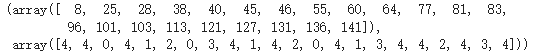

In [ ]:
import numpy as np #nonzero
##在此處撰寫程式碼以檢查空值位置 (10分)
np.nonzero(np.array(mypd.isnull()))

(array([  8,  25,  28,  38,  40,  45,  46,  55,  60,  64,  77,  81,  83,
         96, 101, 103, 113, 121, 127, 131, 136, 141]),
 array([4, 4, 0, 4, 1, 2, 0, 3, 4, 1, 4, 2, 0, 4, 1, 3, 4, 4, 2, 4, 3, 4]))

使用isnull找出mypd中有空值的地方(空的為True，有值的為False)，然後再用np.array把它轉成陣列的形式，再來利用nonzero來把空值的列與欄用二維陣列找出。

<font color='BLUE'>由於我們要利用前面四個欄位，來預測最後一個欄位，所以分類欄位不能有空值

<font color='BLUE'>所以先測試分類欄位是否[不是空值]，由結果可以用來過濾列來留下分類欄位下有值的列。

<font color='BLUE'>再將index重新設定，最後得到下面的結果



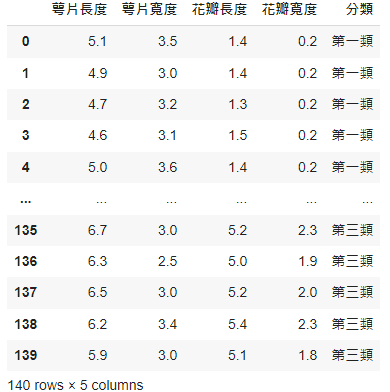




In [ ]:
##在此處撰寫程式碼以去除分類欄位為空值的列，重設index (5分)
mypd=mypd.loc[mypd.分類.isnull()!=True,:]
mypd.index=range(0,len(mypd))
mypd

,萼片長度,萼片寬度,花瓣長度,花瓣寬度,分類
0,5.1,3.5,1.4,0.2,第一類
1,4.9,3.0,1.4,0.2,第一類
2,4.7,3.2,1.3,0.2,第一類
3,4.6,3.1,1.5,0.2,第一類
4,5.0,3.6,1.4,0.2,第一類
...,...,...,...,...,...
135,6.7,3.0,5.2,2.3,第三類
136,6.3,2.5,5.0,1.9,第三類
137,6.5,3.0,5.2,2.0,第三類
138,6.2,3.4,5.4,2.3,第三類


使用loc來存取我們要的資料，我們要的是mypd中分類不等於空值的資料(isnull()!=True等於isnull中不是True的"列")，然後','後面是每個欄位都要抓的意思，記得要打mypd=...不然mypd的資料不會被修改掉。然後用.index把mypd的index改成由0~mypd的長度(不包含最後一個數)

<font color='BLUE'>計算花瓣的平均長度與寬度 

<font color='BLUE'>計算結果分別為3.761313868613141與1.1788321167883213

In [ ]:
##在此處撰寫程式碼以計算花瓣的平均長度  (5分) mypd.花瓣長度.dropna().mean()也可以，然後dropna是會把空值去掉，只計算所有有值的列的平均
a=mypd.loc[:,'花瓣長度']
b=a.mean()
print(b)
##在此處撰寫程式碼以計算花瓣的平均寬度 
c=mypd.loc[:,'花瓣寬度']
d=c.mean()
print(d)

3.761313868613141
1.1788321167883213


a等於mypd中每列的花瓣長度，使用.mean()使b=a(花瓣長度)的平均值。c等於mypd中每列的花瓣寬度，使用.mean()使d=c(花瓣寬度)的平均值。loc前面是列,後是欄

<font color='BLUE'>將花瓣[長度或寬度]有空值的空格，分別利用花瓣的平均長度與寬度填入

In [ ]:
##在此處撰寫程式碼，對花瓣的長度與寬度填值 (10分)
mypd=mypd.fillna({'花瓣長度':b,'花瓣寬度':d})

使用.fillna()把花瓣長度和花瓣寬度有空值的地方分別填入b(花瓣長度平均值)和d(花瓣寬度平均值)。用的是字典的方法

<font color='BLUE'>將萼片[長度或寬度]有空值的空格，直接將整列資料剃除掉

In [ ]:
##在此處撰寫程式碼，將萼片終有空值的資料列刪除 (5分)
mypd=mypd.dropna(axis=0)
mypd

,萼片長度,萼片寬度,花瓣長度,花瓣寬度,分類
0,5.1,3.5,1.4,0.2,第一類
1,4.9,3.0,1.4,0.2,第一類
2,4.7,3.2,1.3,0.2,第一類
3,4.6,3.1,1.5,0.2,第一類
4,5.0,3.6,1.4,0.2,第一類
...,...,...,...,...,...
135,6.7,3.0,5.2,2.3,第三類
136,6.3,2.5,5.0,1.9,第三類
137,6.5,3.0,5.2,2.0,第三類
138,6.2,3.4,5.4,2.3,第三類


利用dropna將萼片中有空值的列剃除(因為其他欄位都處理過了，所以其他欄位不會有空值)，axis=0是刪除列，axis=1是刪除欄(會變成萼片中只要有空值，整欄都會被刪掉)，axis是軸度不寫的話預設就是0

# <font color='red'>2.資料的預處理</font>

<font color='BLUE'>將資料中萼片的[長度與寬度]的欄位剃除，得到如下的結果:

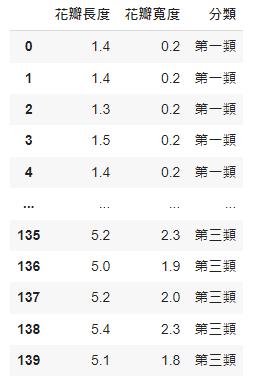




In [ ]:
##在此處撰寫程式碼，將萼片的[長度與寬度]的欄位剃除 (5分)
#mypd=mypd.loc[:,['花瓣長度','花瓣寬度','分類']] 也可以，它是用存取(過濾的方式)，存取每列的，花瓣長度、花瓣寬度、分類三欄
mypd=mypd.drop('萼片長度',axis=1)
mypd=mypd.drop('萼片寬度',axis=1)
mypd

,花瓣長度,花瓣寬度,分類
0,1.4,0.2,第一類
1,1.4,0.2,第一類
2,1.3,0.2,第一類
3,1.5,0.2,第一類
4,1.4,0.2,第一類
...,...,...,...
135,5.2,2.3,第三類
136,5.0,1.9,第三類
137,5.2,2.0,第三類
138,5.4,2.3,第三類


使用drop將萼片長度與寬度欄位刪除，軸度axis=1就是刪除欄

<font color='BLUE'>將資料中分類的欄位中，第一類、第二類與第三類，分別用1,2與3取代，得到如下的結果


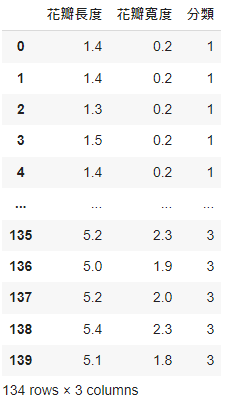

In [ ]:
##在此處撰寫程式碼，將分類的欄位中，第一類、第二類與第三類，分別用1,2與3取代 (10分)
mypd.分類 = mypd.分類.map({'第一類':1,'第二類':2,'第三類':3})
mypd

,花瓣長度,花瓣寬度,分類
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
135,5.2,2.3,3
136,5.0,1.9,3
137,5.2,2.0,3
138,5.4,2.3,3


使用map(對應)的方式再利用像是字典來將分類中的第一類、第二類與第三類，分別用1,2與3取代

<font color='BLUE'>將資料中花瓣長度的值，小於3用0取代，大於等於3到5之間用1取代，大於等於5用2取代，得到如下的結果:

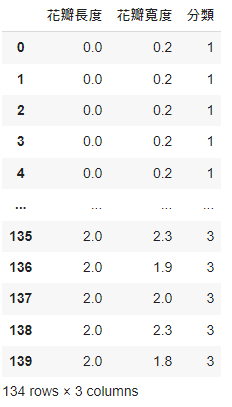

In [ ]:
##在此處撰寫程式碼，將花瓣長度的值對應到0~2   (10分)
mypd.loc[mypd.花瓣長度<3,'花瓣長度']=0
mypd.loc[(mypd.花瓣長度>=3) & (mypd.花瓣長度<5),'花瓣長度']=1
mypd.loc[mypd.花瓣長度>=5,'花瓣長度']=2
mypd

,花瓣長度,花瓣寬度,分類
0,0.0,0.2,1
1,0.0,0.2,1
2,0.0,0.2,1
3,0.0,0.2,1
4,0.0,0.2,1
...,...,...,...
135,2.0,2.3,3
136,2.0,1.9,3
137,2.0,2.0,3
138,2.0,2.3,3


使用loc將花瓣長度<3的行，那行的花瓣長度變成0。花瓣長度>3 & <5的行，那行的花瓣長度變成1，花瓣長度>5的行，那行的花瓣長度變成2。

In [ ]:
##在此處撰寫程式碼，將花瓣長度的值對應到0~2   (10分)
#def myfun(x):
#  if x<3:
#    return 0
#  elif x<5:
#    return 1
#  else:
#    return 2
#mypd.花瓣長度=mypd.花瓣長度.map(myfun)

利用函式的方式，把mypd的花瓣長度丟進x中，然後利用map(之前是1對1，這次是區域)，將花瓣長度<3的行，那行的花瓣長度變成0。花瓣長度>3 & <5的行，那行的花瓣長度變成1，花瓣長度>5的行，那行的花瓣長度變成2。

# <font color='red'>3.訓練資料與測試資料的分割</font>

<font color='BLUE'>由於有四分之三的資料要拿來當訓練資料，所以會有四分之一的資料要拿來當作測試資料，因此要將上述處裡完的資料進行分割。

<font color='BLUE'>分割方式如下:
1. 利用亂數產生器產生介於0\~3的整數，並存入到mylist列表中:
  結果如下:(由於是利用亂數產生，所以產生結果會不一樣，但可以自行判斷值是否介於0\~3)

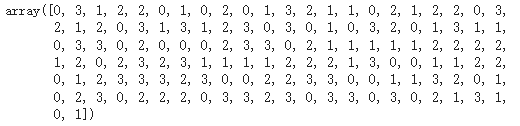

In [ ]:
##在此處撰寫程式碼，產生0~3的整數 (5分)
mylist=np.random.randint(0,4,len(mypd))
mylist

array([3, 3, 3, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 3, 3, 1,
       1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 3, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0,
       1, 0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3,
       3, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 3, 2, 0, 3, 1, 0, 3, 0, 3, 1, 0,
       0, 3, 2, 1, 2, 2, 1, 2, 0, 3, 0, 3, 3, 3, 2, 3, 3, 1, 1, 3, 2, 2,
       1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 0, 0, 1, 3, 2, 0, 2, 3, 1, 1, 2, 3,
       3, 0])

使用np.random.randint()製造一個隨機選取0~4(不包含4)的整數，總共len(mypd)個的一維陣列。

<font color='BLUE'>2. 利用過濾的方式判斷mylist是否等於0，若等於0則將該列放到test中，否則則放到train中。並將train資料與test資料的index重設，結果如下

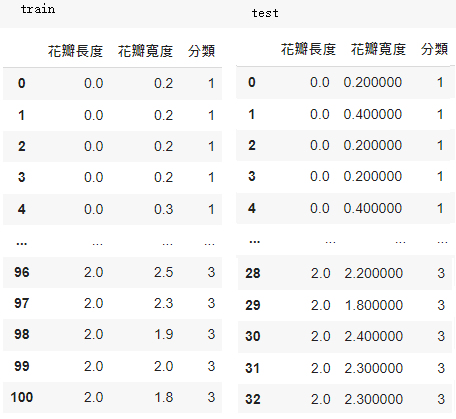

In [ ]:
##在此處撰寫程式碼，判斷mylist是否不等於0，利用過濾的方式指定到train資料，並且將index重設 (5分)

train=mypd.loc[mylist !=0]
train.index=range(0,len(train))
train

,花瓣長度,花瓣寬度,分類
0,0.0,0.2,1
1,0.0,0.2,1
2,0.0,0.2,1
3,0.0,0.2,1
4,0.0,0.2,1
...,...,...,...
91,2.0,2.5,3
92,2.0,2.3,3
93,2.0,1.9,3
94,2.0,2.0,3


利用loc把mylist中不等於0(不等於0判斷中True的位子對應到mypd)從mypd中拉出來存到train中，然後把train的index改成0~len(train)-1

In [ ]:
##在此處撰寫程式碼，判斷mylist是等於0，利用過濾的方式指定到test資料，並且將index重設 (5分)

test=mypd.loc[mylist ==0]
test.index=range(0,len(test))
test

,花瓣長度,花瓣寬度,分類
0,0.0,0.300000,1
1,0.0,0.200000,1
2,0.0,0.200000,1
3,0.0,0.100000,1
4,0.0,0.200000,1
5,0.0,0.400000,1
6,0.0,0.200000,1
7,0.0,0.400000,1
8,0.0,0.200000,1
9,0.0,0.100000,1


利用loc把mylist中等於0的(等於0判斷中True的位子對應到mypd)從mypd中拉出來存到test中，然後把test的index改成0~len(test)-1

# <font color='red'>4.預測結果分析</font>

<font color='BLUE'>由於我們沒有真正進行預測，所以利用亂數產生器產生0~1的數字，來當作是預測的結果。產生亂數的個數，與test列的個數相同:


<font color='BLUE'>1.陣列a用以表示是第一類的機率是多少

<font color='BLUE'>2.陣列b用以表示是第二類的機率是多少

<font color='BLUE'>3.陣列c用以表示是第三類的機率是多少

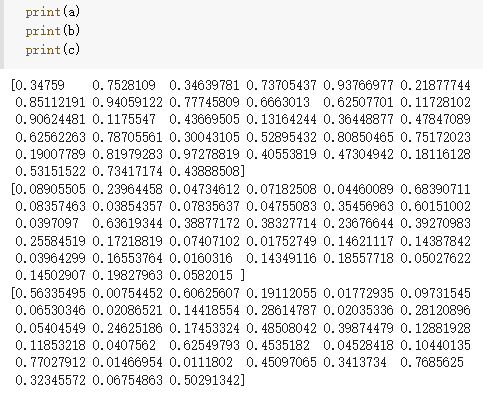


In [ ]:
import numpy as np
a=np.random.random(len(test))
b=np.random.uniform(low=0, high=1-a, size=(len(test),))
c=1-a-b
print(a)
print(b)
print(c)

[0.96387787 0.4219306  0.53186825 0.8734247  0.79719415 0.26607331
 0.3478003  0.78643522 0.25313931 0.36144538 0.84902912 0.78326466
 0.67382843 0.73200716 0.0483652  0.89318328 0.01319746 0.41320342
 0.8661541  0.53888659 0.26034736 0.80851287 0.88076365 0.56260719
 0.70002583 0.94787531 0.43116347 0.75014043 0.52671607 0.57688496
 0.74862917 0.82713062 0.55597674 0.32725853 0.87763182 0.37027386
 0.16392813 0.48927218]
[0.02127306 0.31829726 0.24416556 0.10783054 0.06636478 0.05126357
 0.36056094 0.15652875 0.66151258 0.56903315 0.09334524 0.12457277
 0.28695417 0.14899468 0.94199503 0.04626672 0.92021284 0.13115658
 0.0262761  0.43261362 0.67482203 0.02945477 0.02693765 0.01111787
 0.11012444 0.04198482 0.56489067 0.01950938 0.13337789 0.31898945
 0.09439983 0.10486963 0.34757376 0.42284648 0.06313146 0.08953868
 0.07937293 0.461937  ]
[0.01484907 0.25977214 0.2239662  0.01874476 0.13644107 0.68266312
 0.29163876 0.05703603 0.08534811 0.06952147 0.05762564 0.09216257
 0.0392174  0.

<font color='BLUE'>將三個陣列合成一個陣列:

<font color='BLUE'>1.首先必須先將三個陣列改成二維陣列，每一列包含一個數字

<font color='BLUE'>2.將三個陣合併成一個，每一列包含三個數字，分別代表是第一類、第二類以及第三類的機率。而每一列的機率總和為1。

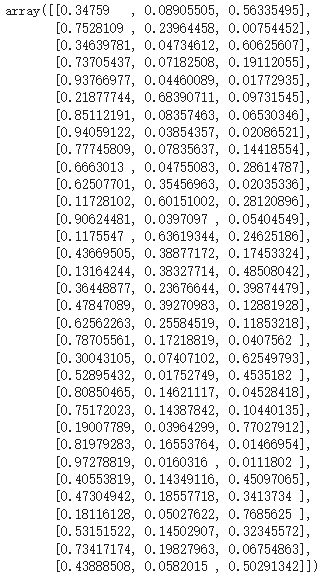

In [ ]:
##在此處撰寫程式碼，將上述的a、b與c陣列，合成一個名叫predict陣列，每列具有3個元素 (5分)
a=a.reshape(len(a),1)
b=b.reshape(len(b),1)
c=c.reshape(len(c),1)
predict=np.hstack([a,b,c])
predict

array([[0.96387787, 0.02127306, 0.01484907],
       [0.4219306 , 0.31829726, 0.25977214],
       [0.53186825, 0.24416556, 0.2239662 ],
       [0.8734247 , 0.10783054, 0.01874476],
       [0.79719415, 0.06636478, 0.13644107],
       [0.26607331, 0.05126357, 0.68266312],
       [0.3478003 , 0.36056094, 0.29163876],
       [0.78643522, 0.15652875, 0.05703603],
       [0.25313931, 0.66151258, 0.08534811],
       [0.36144538, 0.56903315, 0.06952147],
       [0.84902912, 0.09334524, 0.05762564],
       [0.78326466, 0.12457277, 0.09216257],
       [0.67382843, 0.28695417, 0.0392174 ],
       [0.73200716, 0.14899468, 0.11899816],
       [0.0483652 , 0.94199503, 0.00963977],
       [0.89318328, 0.04626672, 0.06054999],
       [0.01319746, 0.92021284, 0.06658969],
       [0.41320342, 0.13115658, 0.45563999],
       [0.8661541 , 0.0262761 , 0.1075698 ],
       [0.53888659, 0.43261362, 0.0284998 ],
       [0.26034736, 0.67482203, 0.0648306 ],
       [0.80851287, 0.02945477, 0.16203236],
       [0.

利用a=reshape...(如果用resize的話就不用a=因為它會直接改但reshape不會)另a的陣列變成len(a)個一維陣列(等於二維陣列)，再利用hstack將abc串在一起。

<font color='BLUE'>我們以最大的機率當作是預測結果，舉例來說，第一列中[0.34759   , 0.08905505, 0.56335495]的最大值為0.56335495，代表第一筆資料預測為第三類。所以第一筆的預測結果是3。

<font color='BLUE'>為了要把所有的預測結果都找出來，首先我們先把每一列的最大值找出來，結果如下:

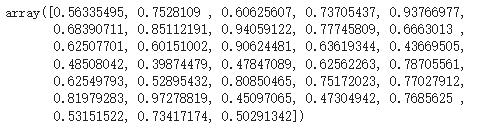


In [ ]:
##在此處撰寫程式碼，將predict陣列中每一列的的最大值找出來 (5分)

predict_max=predict.max(axis=1)
predict_max

array([0.96387787, 0.4219306 , 0.53186825, 0.8734247 , 0.79719415,
       0.68266312, 0.36056094, 0.78643522, 0.66151258, 0.56903315,
       0.84902912, 0.78326466, 0.67382843, 0.73200716, 0.94199503,
       0.89318328, 0.92021284, 0.45563999, 0.8661541 , 0.53888659,
       0.67482203, 0.80851287, 0.88076365, 0.56260719, 0.70002583,
       0.94787531, 0.56489067, 0.75014043, 0.52671607, 0.57688496,
       0.74862917, 0.82713062, 0.55597674, 0.42284648, 0.87763182,
       0.54018747, 0.75669894, 0.48927218])

利用.max找出每個軸度1的陣列中最大的值找出來

<font color='BLUE'>產生一個陣列result，長度為test的列的長度，將裡面元素都填1，代表一開始內定值為第一類

In [ ]:
##在此處撰寫程式碼，產生result陣列 (5分)
result=np.ones(len(test))
result

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

產生一串長度為len(test)的陣列並且裡面都填入1

<font color='BLUE'>測試最大值是否等於陣列predict的第一欄位，再利用過濾的方式，將result陣列的相對位置設定為2

<font color='BLUE'>測試最大值是否等於陣列predict的第二欄位，再利用過濾的方式，將result陣列的相對位置設定為3


<font color='BLUE'>result陣列的最後結果


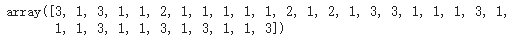

In [ ]:
##在此處撰寫程式碼，測試最大值是否等於陣列predict的第一欄位，有就把result設定為2 (5分)
a = predict_max==predict[:,1]
result[a]=2
##在此處撰寫程式碼，測試最大值是否等於陣列predict的第二欄位，有就把result設定為3 
a = predict_max==predict[:,2]
result[a]=3

令a=predict_max==predict [ :,1 ] (每一行的第一列)，如果一樣的話會是True(a就是一串True&False)，然後把result內True的位子改成2。

In [ ]:
result

array([1., 1., 1., 1., 1., 3., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
       3., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
       1., 3., 3., 1.])

<font color='BLUE'>測試result值與test的分類欄位相同的個數，也就是計算預測正確的個數

<font color='BLUE'>將預測正確的個數除以test的總筆數，就可以計算出正確率


In [ ]:

##在此處撰寫程式碼，計算正確率   (5分)
np.count_nonzero(result==test.分類)/len(test)

0.42105263157894735

利用np.count_nonzero來算出result==test.分類內True的數量，然後再除以len(test)，就能算出正確率